<a href="https://colab.research.google.com/github/Abdulaziz-Sherif/10-CHL5230-F23/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Uploading Dataset 2 csv to Google Colab
from google.colab import files
uploaded = files.upload()

#Read the dataset into a pandas dataframe and import libraries

import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Import necessary libraries

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import additional libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns


df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))

# Check for missing values
print(df.isnull().sum())

# Determine number of samples in data
print(df.describe())

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv
Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64
               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000 

In [20]:
#Alborz's Data Analysis
#We are trying to find the degree to which the comorbidities of chest-pain, obesity and coughing of blood can predict lung disease.

# Preprocess the data by splitting it into features and labels

X = df[['Chest Pain', 'Obesity', 'Coughing of Blood']]
Y = df['Lung Disease']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling the features since KNN is sensitive to magnitude
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Apply K-NN and fit the model, and predict using the test data
knn = KNeighborsClassifier(n_neighbors=12) # Setting K = 12
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

#predict using test data
Y_pred = knn.predict(X_test)


# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[15 10  4  3  0  0  0]
 [ 6 42 15  2  0  4  0]
 [ 4 11 30  2  0  0  0]
 [ 1  2  3 33  1  0  0]
 [ 1  6  1  0 12  0  0]
 [ 0  0  1  0  5 57  0]
 [ 0  0  0  0  0  8 14]]
              precision    recall  f1-score   support

           1       0.56      0.47      0.51        32
           2       0.59      0.61      0.60        69
           3       0.56      0.64      0.59        47
           4       0.82      0.82      0.82        40
           5       0.67      0.60      0.63        20
           6       0.83      0.90      0.86        63
           7       1.00      0.64      0.78        22

    accuracy                           0.69       293
   macro avg       0.72      0.67      0.69       293
weighted avg       0.70      0.69      0.69       293



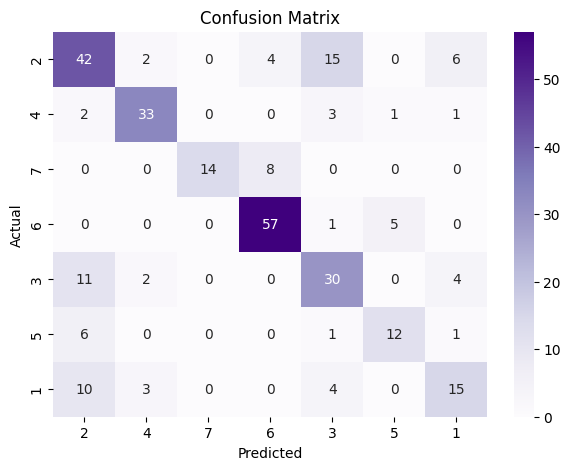

In [21]:
# Get unique classes
classes = df['Lung Disease'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

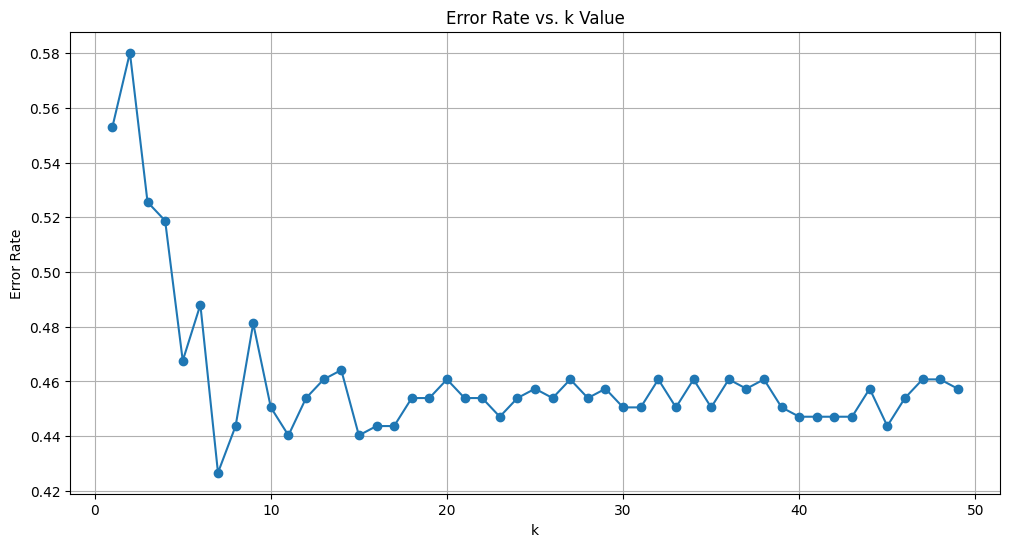

In [18]:
# Split dataset into training set and test set
# We are reserving 20% of the data for testing and 80% for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Choose a range of k values to test. In this case, we'll test values from 1 to 49.
k_values = range(1, 50)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, Y_train)

    # Predict the labels for the test set.
    Y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(Y_test, Y_pred)
    errors.append(error)

# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

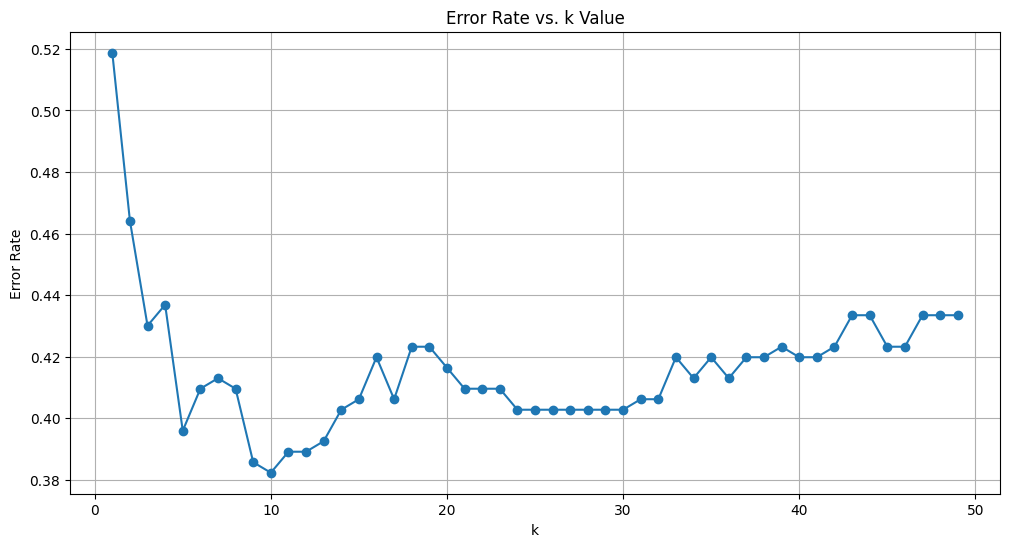

In [4]:
#Amanda's Data Analysis
# The objective is to predict the classification of lung disease by features of personal behaviour/activities, i.e. Smoking and Alcohol Use
# Preprocessing the data; first split the data into features and label
x = df[['Smoking', 'Alcohol Usage']]
y = df['Lung Disease']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features since KNN is sensitive to magnitude
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Finding the optimal value for k
# Testing k values from a range of 1 to 49
k_values = range(1, 50)

# A list to keep track of the error rates for each k value
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
     # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(x_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(x_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# Plotting the realtionship between k value and the error rate
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [5]:
# Apply K-NN and fit the model, and predict using the test data
knn = KNeighborsClassifier(n_neighbors=10)  # Setting K according to the elbow in the error rate vs. k value graph, k = 10
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [6]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8 18  2  2  0  2  0]
 [ 2 51  3  6  0  7  0]
 [ 4 16 22  3  1  1  0]
 [ 1  5  2 30  1  1  0]
 [ 1  4  3  2 10  0  0]
 [ 0  2  0  0  0 46 15]
 [ 2  0  0  0  0  6 14]]
              precision    recall  f1-score   support

           1       0.44      0.25      0.32        32
           2       0.53      0.74      0.62        69
           3       0.69      0.47      0.56        47
           4       0.70      0.75      0.72        40
           5       0.83      0.50      0.62        20
           6       0.73      0.73      0.73        63
           7       0.48      0.64      0.55        22

    accuracy                           0.62       293
   macro avg       0.63      0.58      0.59       293
weighted avg       0.63      0.62      0.61       293



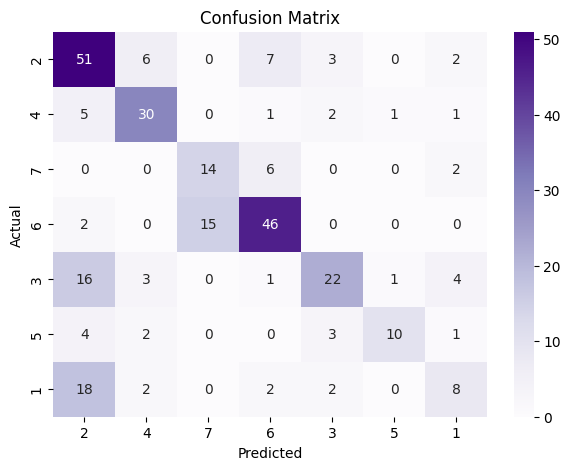

In [7]:
# Visualizing KNN results using Confusion Martix heatmap
# Get unique classes
classes = df['Lung Disease'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
#Abdulaziz's Data Analysis
#We are trying to create a model that can predict lung disease from environmental features
# Apply K-NN and fit the model, and predict using the test data using k=10
X= df[["Air Pollution", "Passive Smoker"]]
y= df["Lung Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3 14  5  4  1  5  0]
 [ 4 46  5  2  4  8  0]
 [ 3 13 22  3  2  4  0]
 [ 1  6  1 27  0  5  0]
 [ 0  3  3  3  8  3  0]
 [ 0  1  0  0  0 44 18]
 [ 2  3  0  0  0  0 17]]
              precision    recall  f1-score   support

           1       0.23      0.09      0.13        32
           2       0.53      0.67      0.59        69
           3       0.61      0.47      0.53        47
           4       0.69      0.68      0.68        40
           5       0.53      0.40      0.46        20
           6       0.64      0.70      0.67        63
           7       0.49      0.77      0.60        22

    accuracy                           0.57       293
   macro avg       0.53      0.54      0.52       293
weighted avg       0.55      0.57      0.55       293



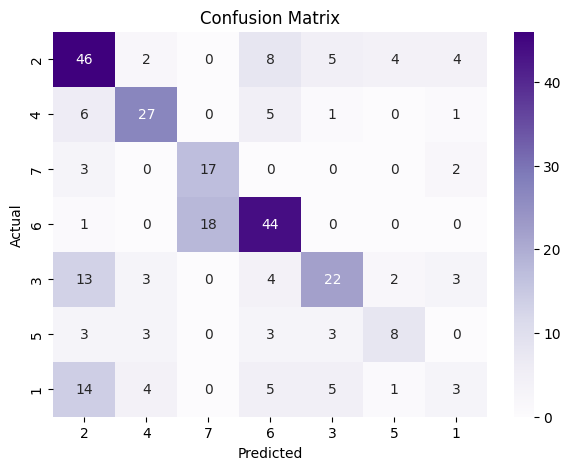

In [9]:
#Plot Confusion Matrix
classes = df['Lung Disease'].unique()
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Choose a range of k values to test. In this case, we'll test values from 1 to 49.
k_values = range(1, 50)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

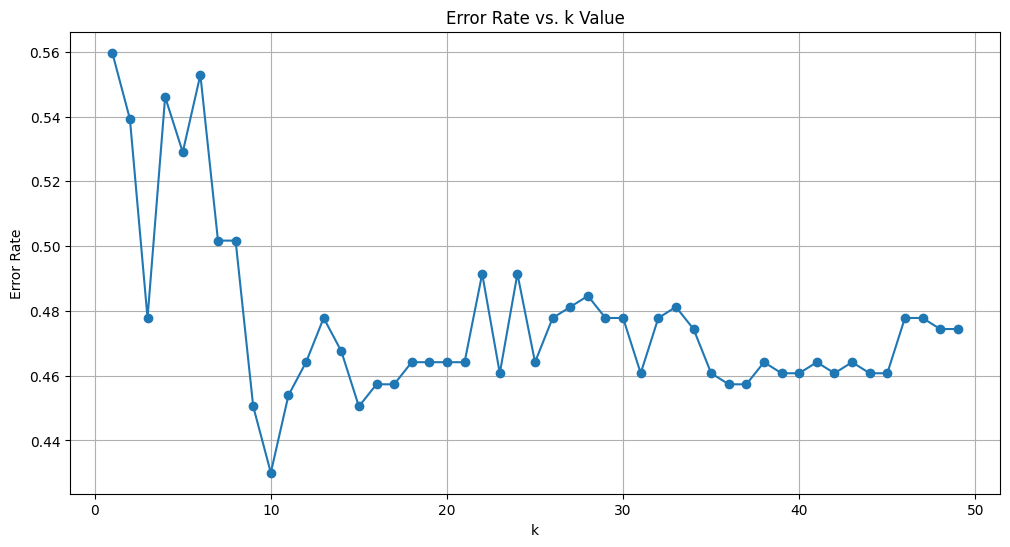

In [13]:
# Plotting error rate vs k value
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()